In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pandas as pd
import seaborn as sns

df = pd.read_csv("USA_Housing.csv") 
df.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [40]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

features = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]]
corr_result = features.corr(method=histogram_intersection).to_numpy()
print(corr_result)

[[1.00000000e+00 2.98861000e+04 3.49390000e+04 1.99066000e+04
  1.80309324e+08]
 [2.98861000e+04 1.00000000e+00 2.88881000e+04 1.94647000e+04
  2.98861000e+04]
 [3.49390000e+04 2.88881000e+04 1.00000000e+00 1.99058000e+04
  3.49390000e+04]
 [1.99066000e+04 1.94647000e+04 1.99058000e+04 1.00000000e+00
  1.99066000e+04]
 [1.80309324e+08 2.98861000e+04 3.49390000e+04 1.99066000e+04
  1.00000000e+00]]


In [57]:
def SeperateData(data, ratio):
    N_train = int(len(data) * ratio)
    N_test = len(data) - N_train
    train_data = data[0:N_train]
    test_data = data[N_train:data.shape[0]]

    return train_data, test_data

(6, 6)
(6, 1)
rms: 80.07436097258747


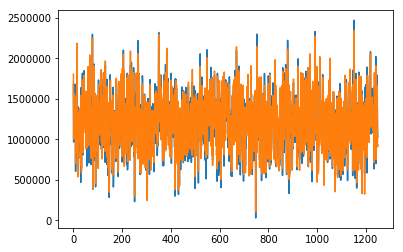

In [100]:
def linearRegression(features, target):
    features = np.insert(features, 0, 1, axis=1)
    A = np.dot(features.T, features)
    b = np.dot(features.T, target)
    print(A.shape)
    print(b.shape)
    w =  np.linalg.solve(A, b)

    return w

def Evaluation(features, w, target):
    features = np.insert(features, 0, 1, axis=1)
    prediciton = np.dot(features, w) 
    return prediciton

data = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population", "Price"]]
data = data.sample(frac=1).reset_index(drop=True)

train_data, test_data = SeperateData(data, 0.75)

train_f = train_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]].to_numpy()
train_t = train_data["Price"].to_numpy().reshape(train_data.shape[0], 1)

w = linearRegression(train_f, train_t)

test_f = test_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]].to_numpy()
test_t = test_data["Price"].to_numpy().reshape(test_data.shape[0], 1)
prediciton = Evaluation(test_f, w, test_t)

rms_error = np.sqrt(np.mean(np.square(test_t - prediciton))) / test_t.shape[0]
print("rms:", rms_error)

plt.plot(test_t)
plt.plot(prediciton)
plt.show()